<a href="https://colab.research.google.com/github/adithyamadhavan/getting_started/blob/main/Copy_of_COM4509_lab1_(2024_25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COM4509/6509 - Lab 1: Probability

## Introduction to the Dataset

For this exercise we'll use the [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset): 253,680 Americans were called to ask about some of their health-related behaviours (eating fruit etc), and some health outcomes (have they diabetes, etc).

We first need to import various modules we'll use, download the dataset and open it, including [pandas](https://pandas.pydata.org), a data analysis and manipulation library, for looking at this data.

In [ ]:
import pandas as pd   #useful for data access and manipulation
import urllib.request #used to download the dataset
import matplotlib.pyplot as plt #useful for plotting
#ensure our plots appear in the notebook:
%matplotlib inline
import numpy as np    #numpy is useful for matrix/array/tensor manipulation

Now download and open the dataset:

In [ ]:
urllib.request.urlretrieve('https://drive.google.com/u/0/uc?id=1dprY31miDsQSZZwMkOfHoqkH4TQ8gV2W&export=download', './diabetes.csv')
df = pd.read_csv('diabetes.csv')

We can look at the content: It is a large table, containing 253680 rows (each row is a person) and 22 columns:

In [ ]:
print("The columns in the dataset:")
print(df.columns)

The columns in the dataset:
Index(['Unnamed: 0', 'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')


The dataframe itself:

In [ ]:
df

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,62.0,4.0,3.0
1,1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,52.0,6.0,1.0
2,2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,62.0,4.0,8.0
3,3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,72.0,3.0,6.0
4,4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,72.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,42.0,6.0,7.0
253676,253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,72.0,2.0,4.0
253677,253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,27.0,5.0,2.0
253678,253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,52.0,5.0,1.0


To get summary statistics about all these, use the .describe() method of the dataframe:

In [ ]:
df.describe()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,57.138127,5.050434,6.053875
std,73231.252481,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,15.323466,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000
25%,63419.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,47.000000,4.000000,5.000000
50%,126839.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,57.000000,5.000000,7.000000
75%,190259.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,67.000000,6.000000,8.000000
max,253679.000000,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,82.000000,6.000000,8.000000


## Probabilities

We can estimate probabilities from this sample of the population.

Probabilities can be defined as the limit between the ratio of the number of positive outcomes (e.g. heads, if flipping a coin) and the number of trials:

$$P(Y = y) = \lim_{N \rightarrow \infty} \frac{n_y}{N}$$

If you only have a finite number of samples, we can assume that the ratio is still approximately correct for now:

$$P(Y = y) \approx \frac{n_y}{N}$$

### Using the dataset to find some probabilities

What is the probability a person in this dataset is under 50?

As with numpy arrays, we can do a boolean operation on all of them to get a boolean array of which items the condition is true for:

In [ ]:
df['Age']<50

,Age
0,False
1,False
2,False
3,False
4,False
...,...
253675,True
253676,False
253677,True
253678,False


If we ask for the mean, it will give us the proportion that are true:

In [ ]:
P_AgeLessThan50 = np.mean(df['Age']<50) #we can use the mean as the comparison returns a boolean with False being treated as a zero, and a True as a one.
print("%0.1f%% of people in the dataset are <50 years old" % (100*P_AgeLessThan50))

29.3% of people in the dataset are <50 years old


What is the probability a person in the dataset is under 50 AND regularly eats vegatables? (JOINT PROBABILITY)

In [ ]:
P_AgeLessThan50andVeg = np.mean((df['Age']<50) & (df['Veggies']))
print("%0.1f%% of people in the dataset are <50 years old AND eat vegetables." % (100*P_AgeLessThan50andVeg))

23.9% of people in the dataset are <50 years old AND eat vegetables.


### Product Rule

What is the probability that they eat vegetables GIVEN they are under 50.

The product rule for probability we learnt was:

$$P(A,B) = P(A|B) P(B)$$

If we rearrange it we can find the conditional probability (please make sure you understand this step):

$$\frac{P(Veg=true, Age<50)}{P(Age<50)} = P(Veg=true\;|\;Age<50)$$

This is a conditional probability. Let's work it out:

In [ ]:
#P(Veg|lt50) = P(Veg, lt50) / P(lt50)
print("Probability of eating vegetables GIVEN they are under 50: %0.1f%%" % (100*P_AgeLessThan50andVeg/P_AgeLessThan50))

Probability of eating vegetables GIVEN they are under 50: 81.8%


We can check this a different way, by picking out those who are under 50, and the looking at the proportion of those who eat vegetables:

In [ ]:
dfAgeLessThan50 = df[df['Age']<50] #makes a new dataframe with just those under 50.

#of this dataframe, the proportion who eat veg:
print("Probability of eating vegetables GIVEN they are under 50: %0.1f%%" % (100*np.mean(dfAgeLessThan50['Veggies'])))

Probability of eating vegetables GIVEN they are under 50: 81.8%


### Exercise 1: Fruit, Vegetables and Indepence

We can get if someone eats fruit regularly using `df['Fruits']==1` and if they eat veg regularly using `df['Veggies']==1`. Compute:

- a. the probability of eating fruit regularly.
- b. the probability of eating vegetables regularly.
- c. the probability of eating both fruit AND vegetables regularly.
- d. does it seem like they are independent or not?

Tip:
> You might find the error "TypeError: unsupported operand type(s) for &: 'float' and 'float'" when trying to find the proportion of those who eat fruit AND veg, you are trying to do a boolean & on two floats, i.e. "1.0 & 1.0". The trick is either a typecast or do something like: `np.mean((df['Veggies']==1) & (df['Fruits']==1))`

---
Answer here.

---

In [ ]:
df[df['Fruits']==1].shape[0]/len(df)*100

63.425575528224535

In [ ]:
print('Probability of eating fruits daily:',df[df['Fruits']==1].shape[0]/len(df)*100)
print('Probability of eating veggies daily:',df[df['Veggies']==1].shape[0]/len(df)*100)
print('Probability of eating fruits & veggies daily:',df[(df['Veggies']==1)&(df['Fruits']==1)].shape[0]/len(df)*100)



Probability of eating fruits daily: 63.425575528224535
Probability of eating veggies daily: 81.1419899085462
Probability of eating fruits & veggies daily: 56.25670135603911


### Exercise 2: Diabetes

We can find the proportion of the participants that have diabetes.

The diabetes column is:

- 0 = no diabetes
- 1 = prediabetes
- 2 = diabetes

So we can write:

In [ ]:
P_diabetes = np.mean(df['Diabetes_012']==2)
print("Probability of diabetes (in this cohort): %0.1f%%" % (100*np.mean(P_diabetes)))

Probability of diabetes (in this cohort): 13.9%


- a. What proportion of those who eat fruit AND vegetables have diabetes?

---

In [ ]:
#Answer here
print('Probability of eating fruits & veggies and have diabetes:',df[(df['Veggies']==1)&(df['Fruits']==1)].loc[df['Diabetes_012']==2].shape[0]/len(df)*100)

Probability of eating fruits & veggies and have diabetes: 6.842084515925576


---

In [ ]:
df[(df['Veggies']==1)&(df['Fruits']==1)].loc[df['Diabetes_012']==2].shape[0]/len(df)*100

6.842084515925576

In [ ]:
 df[(df['Veggies']==1)&(df['Fruits']==1)&(df['Diabetes_012']==2)].shape[0]/len(df)*100

6.842084515925576

- b. A smaller proportion of those who eat fruit and vegetables have diabetes, can we say from this that eating fruit and vegetables can reduce the risk of diabetes?

In [ ]:
'yes'

'yes'

---

Answer here.

---

### Exercise 3: Plotting

One of the columns is the BMI (body mass index) of the participants. Let's plot it in a histogram.

Text(0, 0.5, 'Frequency')

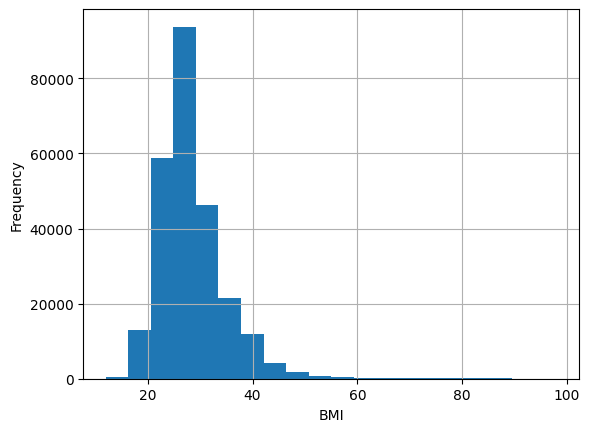

In [ ]:
#it can be useful, for data that has both high counts and low, to switch to a log axis.
#we can do this with the hist method by adding the log=True parameter (Try turning it on / off)
plt.hist(df['BMI'],20)#,log=True);
plt.grid()
plt.xlabel('BMI')
plt.ylabel('Frequency')

Exercise:
    
- a. The second parameter in the call to the `plt.hist` function selects the number of bins. Change it to 30 to get more detail.
- b. Is this a normal distribution? Why/why not?

Text(0, 0.5, 'Frequency')

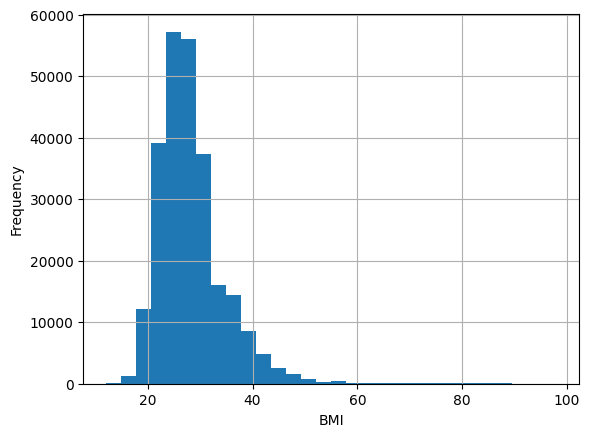

In [ ]:
plt.hist(df['BMI'],30)#,log=True);
plt.grid()
plt.xlabel('BMI')
plt.ylabel('Frequency')

---

Answer to b here.
no it is left skewed

---

Let's look at how BMI and income interact. The 'Income' column is *categorical* (with category 1 meaning less than \$10k/year; and category 8 means \$75k/year or more). Full details are in the ['codebook' for the dataset](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf).

So we create two numpy arrays `BMIofLowIncome` and `BMIofHighIncome` containing the BMI values for those two groups. We can then plot them as histograms too. I've plotted the density (as the two groups are different sizes, this makes it easier to compare). A density means the area under both histograms each sum to one.

Text(0.5, 0, 'BMI')

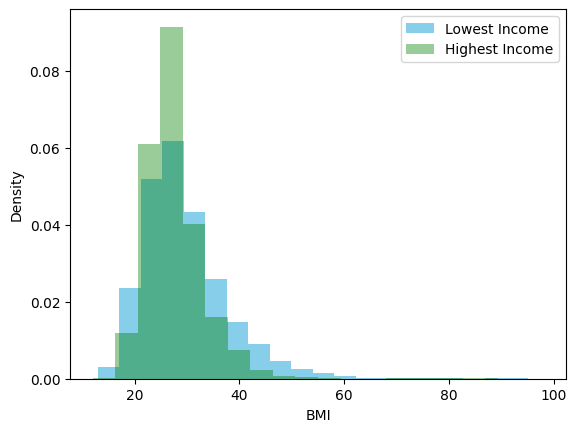

In [ ]:
BMIofLowIncome = df[df['Income']==1]['BMI'].to_numpy()
BMIofHighIncome = df[df['Income']==8]['BMI'].to_numpy()
plt.hist(BMIofLowIncome,20,density=True,histtype='stepfilled',color='skyblue',ec="black",label="Lowest Income")
plt.hist(BMIofHighIncome,20,alpha=0.4,density=True,histtype='stepfilled',color='green',ec="black",label="Highest Income");
plt.legend()
plt.ylabel('Density')
plt.xlabel('BMI')

In [ ]:
print("Mean BMI of high income and low income groups: %0.1f, %0.1f kg/m^2" % (np.mean(BMIofHighIncome),np.mean(BMIofLowIncome)))
print("%0.1f%% of people in the high income group are severely obese, while %0.1f%% of people in the low income group are." % (100*np.mean(BMIofHighIncome>40),100*np.mean(BMIofLowIncome>40)))

Mean BMI of high income and low income groups: 27.6, 29.7 kg/m^2
2.6% of people in the high income group are severely obese, while 8.9% of people in the low income group are.


Although the mean BMI is only slightly higher in the low income group, the increased variance means far more of those in the low income group have very high BMI values.

### Exercise 4: Expectations and Moments

We can compute the variance, using `np.var` of the two groups BMIs:

In [ ]:
np.var(BMIofLowIncome)

np.float64(66.6496538943384)

In [ ]:
np.var(BMIofHighIncome)

np.float64(34.86457316522133)

- a. Can you compute the variance without using the `np.var` or `np.mean` functions? Instead think about how we computed the appropriate expectations. You might find `np.sum(x)` useful (this sums over a list or array) and `len(x)` which will give you the length of an array or list, x.

---

In [ ]:
#Answer here.
np.sum((BMIofLowIncome-(BMIofLowIncome/len(BMIofLowIncome))/len(BMIofLowIncome)))

np.float64(291367.9969729799)

In [ ]:
np.mean(BMIofLowIncome)

np.float64(29.69809397614922)

In [ ]:
mean=np.sum(BMIofLowIncome)/len(BMIofLowIncome)
variance_bmi_low_inc=np.sum((BMIofLowIncome-mean)**2)/len(BMIofLowIncome)
variance_bmi_low_inc

np.float64(66.6496538943384)

In [ ]:
mean=np.sum(BMIofHighIncome)/len(BMIofHighIncome)
variance_bmi_high_inc=np.sum((BMIofHighIncome-mean)**2)/len(BMIofHighIncome)
variance_bmi_high_inc

np.float64(34.86457316522133)

---

- b. The next moment, after the mean and variance is the skewness of a distribution. It is computed by $$\tilde{\mu}_3 = E\Big[\Big(\frac{X-\mu}{\sigma}\Big)^3 \Big]$$
can you compute this?

---

In [ ]:
mean=np.sum(BMIofHighIncome)/len(BMIofHighIncome)
skewness_bmi_high_inc=[]
std_high=np.sqrt(variance_bmi_high_inc)
for i in range(len(BMIofHighIncome)):
  skewness_bmi_high_value=((BMIofHighIncome[i]-mean)/(std_high))**3
  skewness_bmi_high_inc.append(skewness_bmi_high_value)
skewness_high=sum(skewness_bmi_high_inc)/len(skewness_bmi_high_inc)
skewness_high

np.float64(2.520959246290246)

In [ ]:
from scipy import stats
skewness_bmi_low_inc = stats.skew(BMIofHighIncome)
skewness_bmi_low_inc

np.float64(2.5209592462885038)

In [ ]:
mean=np.sum(BMIofLowIncome)/len(BMIofLowIncome)
skewness_bmi_low_inc=[]
std_low=np.sqrt(variance_bmi_low_inc)
for i in range(len(BMIofLowIncome)):
  skewness_bmi_low_value=((BMIofLowIncome[i]-mean)/(std_low))**3
  skewness_bmi_low_inc.append(skewness_bmi_low_value)
skewness_low=sum(skewness_bmi_low_inc)/len(skewness_bmi_low_inc)
skewness_low

np.float64(1.7121432646160009)

---

In [ ]:
from scipy import stats
skewness_bmi_low_inc = stats.skew(BMIofLowIncome)
skewness_bmi_low_inc

np.float64(1.7121432646160626)

# Naive Bayes

The health centre wants to do a blood test on those most at risk of developing diabetes. e.g. if the probability of having diabetes is more than 20\%.

A new patient arrives, who has a BMI of 40. What's the chance that they have diabetes?

$$P(Diabetes = true \; |\; BMI = 40)$$

Remember that the dataframe has a 'Diabetes_012' column (0=no diabetes, 1=pre-diabetic, 2=diabetic). So the proportion of the dataset who are diabetic is:

In [ ]:
np.mean(df['Diabetes_012']==2)

np.float64(0.13933301797540207)

Note that the dataset is **not a representative sample**, so really we wouldn't necessarily want to use it for doing this sort of inference, but we'll continue, as an illustration!

For our patient we can just look at the proportion of those with BMI=40 who have diabetes:

In [ ]:
#Here I create a temporary dataframe with those of a BMI of 40 using `df['BMI']==40]`.
#I then test each value of the Diabetes_012 column, and find the average number that have
#this equal to 2. This givens me the proportion.

dfBMI40 = df[df['BMI']==40] #make a new dataframe with just those with a BMI of 40.
np.mean(dfBMI40['Diabetes_012']==2) #find the proportion of this subset with diabetes

np.float64(0.32063773250664307)

So they fall into our 'high risk' category, as 32% of those with a BMI=40 in the dataset have diabetes.

In [ ]:
#note that, due to the categorical nature of the age the ages are just at these
#discrete points:
np.unique(df['Age'])

array([21., 27., 32., 37., 42., 47., 52., 57., 62., 67., 72., 77., 82.])

## The curse of dimensionality

Supposing we also know they are in the age 21 category, and smoke...

We can again make a dataframe containing just those who:
- have a BMI = 40
- are in the age = 21 category
- and smoke,

In [ ]:
#Here I create a temporary dataframe containing those who have a BMI of 40, are in the
#Age=21 category AND smoke, using `df[(df['BMI']==40) & (df['Age']==21) & (df['Smoker']==1)]`
dfBMI40Age21Smoke = df[(df['BMI']==40) & (df['Age']==21) & (df['Smoker']==1)]
np.mean(dfBMI40Age21Smoke['Diabetes_012']==2)

np.float64(0.0)

Great, 0% chance!!
But there's something a bit wrong about this analyis...

In [ ]:
len(dfBMI40Age21Smoke)

6

There are only 6 people in the dataset with a BMI of 40, who are in the 21 years old category, who smoke.

We can display this whole set:

In [ ]:
dfBMI40Age21Smoke

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
58186,58186,0.0,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,11.0,0.0,0.0,1.0,21.0,4.0,8.0
109921,109921,0.0,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,21.0,5.0,8.0
126529,126529,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,20.0,0.0,0.0,1.0,21.0,5.0,7.0
240700,240700,0.0,1.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,30.0,0.0,0.0,0.0,21.0,4.0,2.0
241084,241084,0.0,1.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,2.0,0.0,0.0,1.0,21.0,4.0,3.0
252523,252523,0.0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,20.0,0.0,0.0,21.0,5.0,2.0


### What are we assuming here?

When we assumed that we can approximate the probability with the ratio of cases to the total number in that condition, we were assuming that the total number was very large, so we were approximating infinite numbers of samples,

$$P(Y = y | Z) \approx \frac{n_{y|z}}{N_Z}$$

Six is not a large enough sample.

### Naive Bayes

<mark>The Naive Bayes classifier is an approach for making this type of inference by assuming **conditional independence between the features** (given the class).</mark> We've already seen (with the fruit and veg above) that this assumption probably is invalid, but it can still give reasonable results.

Let's think about this more carefully:

We are interested in computing the probability of having diabetes (given some features about the person), i.e.:

$P(D=true | x_1, x_2,...,x_n)$.

Quoting from the [wikipedia article](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

> The problem with the above formulation is that if the number of features n is large or if a feature can take on a large number of values, then basing such a model on probability tables is infeasible.

We've seen this problem with the patient above. Only six rows (out of 253,680) in the database have the same features.

### Rewriting with Bayes Rule

We can write the above conditional distribution as:

$$P(D | x_1, x_2,...,x_n) = \frac{P(x_1, x_2,...,x_n | D) \times P(D)}{P(x_1, x_2,...,x_n)}$$

We can use the chain rule of probability, to see that we can write the likelihood term as:

$$P(x_1, x_2,...,x_n | D) = P(x_1 | x_2,...,x_n, D) \times P(x_2 | x_3,...,x_n, D) \times \;... \times \; P(x_{n-1} \;|\; x_n, D)$$

It's not obvious to see why, so let's go through this step-by-step. We start with our likelihood term telling us the probability of having a BMI of 40, an age of 21 and smoking, given Diabetes = true (or false):

$$P(B=40, A=21, S = true | D)$$

We can write this using the product rule, as:

$$P(B=40 | A=21, S = true, D) \times P(A = 21, S = true | D)$$

We can then apply the same reasoning to the second term (try this yourself).

> It's probably worth stopping, writing this down on a bit of paper and thinking about it! This is quite a difficult step, and once you've understood it the rest will be fairly easy.
>
>  We are using:
> $$P(A,B) = P(A|B)\; P(B)$$
> but there's an additional conditional, 'given C' on everything:
> $$P(A,B|C) = P(A|B,C)\; P(B|C)$$

The result is that we can write our likelihood as a product of conditional probabilities:

$$P(B=40, A=21, S = true | D) \; \\= \\ P(B=40 | A=21, S = true, D) \;\;\times\;\; P(A=21 | S = true, D) \;\;\times\;\; P(S=true | D)$$


### The Naive-bit of Naive Bayes

> **Reminder: Condition independence.** If two random variables ($X,Y$) are conditionally independent, given a third ($Z$) it means that $P(X|Y,Z) = P(X|Z)$. I.e. (for a given value of Z) the probability of $X$ isn't influenced by the value of $Y$. It is written as $X \perp \!\!\! \perp Y | Z$.

Naive Bayes: We now make the (conditional) independence assumption in our expression above, that **all the features are conditionally independent (given the diabetes status, D)**.

So if our naive-Bayes assumption holds, we can write that:

$$P(B=40 \; | \; A=21, \; S = true, \; D) \; =\; P(B=40\; |\; D)$$

and,

$$P(A=21 | S = true, D) = P(A=21 | D)$$

Substituting in:

$$P(B=40, A=21, S = true | D) \; =\; P(B=40 | D) \; P(A=21 | D) \; P(S=true | D)$$

Please note that this, in general, isn't true. We are saying it's true because we have assumed conditional independence, e.g. that $B \perp \!\!\! \perp A | D$, etc.

### Why is this useful?

The number of people in the dataset who had a BMI=40, were age=21, and smoked was only 6. But lots of individuals had *each* of these characteristics, so we can use these separately:

Note that Naive Bayes is often used to compute a ratio between two conditions, but here we'll compute the posterior.

$$P(D = true | x_1, x_2,...,x_n) = \frac{P(x_1, x_2,...,x_n | D = true) P(D = true)}{P(x_1, x_2,...,x_n)}$$

To compute the demoninator we marginalise: I.e. we can compute $P(x_1, x_2,...,x_n,D=true)$ and $P(x_1, x_2,...,x_n,D=false)$ and add them up to get $P(x_1, x_2,...,x_n)$.

We've already computed the former when we computed the numerator, as it is the joint probability:

$$P(x_1, x_2,...,x_n, D = true) = P(x_1, x_2,...,x_n | D = true) P(D = true)$$

so we just need to compute,

$$P(x_1, x_2,...,x_n, D = false) = P(x_1, x_2,...,x_n | D = false) P(D = false).$$

Once we find these, we can add them up:

$$P(x_1, x_2,...,x_n) = P(x_1, x_2,...,x_n, D = true) + P(x_1, x_2,...,x_n, D = false)$$

### Putting it together...

Applying the Naive Bayes (conditional independence assumption) and substituting in our features (to keep it readable I've hidden the values the RVs are equal to). So we assume:

$P(B, A, S | D)\;\;\; =\; P(B | D)\;\;\; P(A | D) \;\;\; P(S | D)\\
P(B, A, S | \neg D)\; =\; P(B | \neg D)\; P(A | \neg D) \; P(S | \neg D)$

We can then use these to compute the denominator. Here we're using the above approximations to the likelihoods:

$$P(B,A,S) = P(B, A, S | D) P(D) + P(B, A, S| \neg D)P(\neg D)$$

and finally the posterior we're interested in: (remember that we are now going to be using our approximations, based on our assumptions about independence for these terms).

$$P(D | B, A, S) = \frac{P(B, A, S|D)\;P(D)}{P(B, A, S)}$$


In [ ]:
#we create two dataframes, one of those with diabetes, and one with those without,
dfDiabetes = df[df['Diabetes_012']==2]
dfnotDiabetes = df[df['Diabetes_012']<2]

PBMI40_givenDiabetesTrue = np.mean(dfDiabetes['BMI']==40)
PBMI40_givenDiabetesFalse = np.mean(dfnotDiabetes['BMI']==40)

PAge21_givenDiabetesTrue = np.mean(dfDiabetes['Age']==21)
PAge21_givenDiabetesFalse = np.mean(dfnotDiabetes['Age']==21)

PSmoking_givenDiabetesTrue = np.mean(dfDiabetes['Smoker']==1)
PSmoking_givenDiabetesFalse = np.mean(dfnotDiabetes['Smoker']==1)

PDiabetesTrue = np.mean(df['Diabetes_012']==2)
PDiabetesFalse = np.mean(df['Diabetes_012']<2)

In [ ]:
#P(BMI=40,Age=21,Smoking=true | Diabetes=true)
PallGivenDiabetesTrue = (PBMI40_givenDiabetesTrue * PAge21_givenDiabetesTrue * PSmoking_givenDiabetesTrue * PDiabetesTrue)
#P(BMI=40,Age=21,Smoking=true | Diabetes=false)
PallGivenDiabetesFalse = (PBMI40_givenDiabetesFalse * PAge21_givenDiabetesFalse * PSmoking_givenDiabetesFalse * PDiabetesFalse)

print("Probaility of diabetes, given BMI=40, Age=21 and Smoker = %0.1f %%" % (100*(PallGivenDiabetesTrue) / (PallGivenDiabetesTrue + PallGivenDiabetesFalse)))

Probaility of diabetes, given BMI=40, Age=21 and Smoker = 4.6 %


### Exercise:

- a. What's the probability they have diabetes if they are 62, not a smoker and have a BMI of 20?
- b. What's the probability they are over 50 if they have a BMI of 20 and have diabetes and don't smoke? Use both Naive Bayes and compare to the answer computed with the full conditional distribution (without the independence assumption).

---

In [ ]:
df['Smoker'].unique()

array([1., 0.])

In [ ]:
p_df_diabetes=len(df[df['Diabetes_012']==2])/len(df)
p_df_diabetes_no=len(df[df['Diabetes_012']<2])/len(df)

In [ ]:
#a
df_diabetes=df[df['Diabetes_012']==2]
df_diabetes_no=df[df['Diabetes_012']<2]
#probality of diabetes
p_df_diabetes=len(df[df['Diabetes_012']==2])/len(df)
p_df_diabetes_no=len(df[df['Diabetes_012']<2])/len(df)
#probality of diabetes with bmi of 20 and greater than 20
df_diabetes_bmi_20=np.mean([df_diabetes['BMI']==20])
df_diabetes_bmi_20_no=np.mean([df_diabetes_no['BMI']>20])
#probality of diabetes with age of 62 and greater than 62
df_diabetes_age_62=np.mean([df_diabetes['Age']==62])
df_diabetes_age_62_no=np.mean([df_diabetes_no['Age']>62])
#probality of diabetes with smoker and non smoker
df_diabetes_non_smoke=np.mean([df_diabetes['Smoker']==0])
df_diabetes_non_smoke_no=np.mean([df_diabetes_no['Smoker']==1])
df_diabetes__age_bmi_non_smoke=(df_diabetes_age_62*df_diabetes_bmi_20*df_diabetes_non_smoke)
df_diabetes_age_bmi_non_smoke_no=(df_diabetes_age_62_no*df_diabetes_bmi_20_no*df_diabetes_non_smoke_no)
#probality of all features
df_p_features=(df_diabetes__age_bmi_non_smoke*p_df_diabetes+df_diabetes_age_bmi_non_smoke_no*p_df_diabetes_no)
df_conditional=((p_df_diabetes_no*df_diabetes_non_smoke)*p_df_diabetes/
               ((df_p_features)))
#naive bayes
print(df_conditional)

dfBMI20_Age62_non_smoker=((df_diabetes[df_diabetes['Age']==62])).loc[(df_diabetes['Smoker']==0)&(df['BMI']==20)]
dfBMI20_Age62_smoker=(df[df['Age']==62]).loc[(df['Smoker']==1)&(df['BMI']==20)]
# dfBMI20_Age62_non_smoker
# dfBMI20_Age62_smoker

#np.mean(dfBMI20_Age62_non_smoker['Diabetes_012']==2)

0.5103430452223446


In [ ]:
dfAgeover50=df[df['Age']>50]
dfAgelower50=df[df['Age']<=50]
PBMi20_givenageover50=np.mean(dfAgeover50[dfAgeover50['BMI']==20])
pbmi20_givenagelower50=np.mean(dfAgelower50[dfAgelower50['BMI']==20])

Pdiabetestrue_given_ageover50=np.mean(dfAgeover50['Diabetes_012']==2)
Pdiabetesfalse_given_agelower50=np.mean(dfAgelower50['Diabetes_012']==2)

In [ ]:
#Answers here.
#b
df_diabetes=df[df['Diabetes_012']==2]
df_diabetes_no=df[df['Diabetes_012']<2]
#probality of diabetes
p_df_diabetes=len(df[df['Diabetes_012']==2])/len(df)
p_df_diabetes_no=len(df[df['Diabetes_012']<2])/len(df)
#probality of diabetes with bmi of 20 and greater than 20
df_diabetes_bmi_20=np.mean([df_diabetes['BMI']==20])
df_diabetes_bmi_20_no=np.mean([df_diabetes_no['BMI']>20])
#probality of diabetes with age of 50 and greater than 50
df_diabetes_age_50=np.mean([df_diabetes['Age']>50])
#df_diabetes_age_50_no=np.mean([df_diabetes_no['Age']<=50])
#probality of diabetes with smoker and non smoker
df_diabetes_non_smoke=np.mean([df_diabetes['Smoker']==0])
#df_diabetes_non_smoke_no=np.mean([df_diabetes_no['Smoker']==1])
df_diabetes__age_bmi_non_smoke=(df_diabetes_age_50*df_diabetes_bmi_20*df_diabetes_non_smoke)
df_diabetes_age_bmi_non_smoke_no=(df_diabetes_age_50_no*df_diabetes_bmi_20_no*df_diabetes_non_smoke_no)
#probality of all features
#p(a/b) = p(a)*P(b/a)/p(b)
df_p_features=(df_diabetes__age_bmi_non_smoke*p_df_diabetes+df_diabetes_age_bmi_non_smoke_no*p_df_diabetes_no)
df_conditional=((p_df_diabetes_no*df_diabetes_non_smoke)*p_df_diabetes/
               ((df_p_features)))
#naive bayes
print(df_conditional)

dfBMI20_Age50_non_smoker=((df_diabetes[df_diabetes['Age']==50])).loc[(df_diabetes['Smoker']==0)&(df['BMI']==20)]
dfBMI20_Age50_smoker=(df[df['Age']==50]).loc[(df['Smoker']==1)&(df['BMI']==20)]
dfBMI20_Age50_non_smoker
dfBMI20_Age50_smoker

#np.mean(dfBMI20_Age62_non_smoker['Diabetes_012']==2)

NameError: name 'df_diabetes_age_50_no' is not defined

In [ ]:
#Answers here.
#a
df_diabetes=df[df['Diabetes_012']==2]
df_diabetes_no=df[df['Diabetes_012']<2]
#probality of diabetes
p_df_diabetes=len(df[df['Diabetes_012']==2])/len(df)
p_df_diabetes_no=len(df[df['Diabetes_012']<2])/len(df)
#probality of diabetes with bmi of 20 and greater than 20
df_diabetes_bmi_20=np.mean([df_diabetes['BMI']==20])
df_diabetes_bmi_20_no=np.mean([df_diabetes_no['BMI'] == 20])
#probality of diabetes with age of 50 and greater than 50
df_diabetes_age_50=np.mean([df_diabetes['Age'] == 62])
df_diabetes_age_50_no=np.mean([df_diabetes_no['Age'] == 62])
#probality of diabetes with smoker and non smoker
df_diabetes_non_smoke=np.mean([df_diabetes['Smoker']==0])
df_diabetes_non_smoke_no=np.mean([df_diabetes_no['Smoker']==0])
df_diabetes__age_bmi_non_smoke=(df_diabetes_age_50*df_diabetes_bmi_20*df_diabetes_non_smoke)
df_diabetes_age_bmi_non_smoke_no=(df_diabetes_age_50_no*df_diabetes_bmi_20_no*df_diabetes_non_smoke_no)
#probality of all features
#p(a/b) = p(a)*P(b/a)/p(b)

df_p_features=(df_diabetes__age_bmi_non_smoke*p_df_diabetes+df_diabetes_age_bmi_non_smoke_no*p_df_diabetes_no)
df_conditional = ((df_diabetes__age_bmi_non_smoke) * p_df_diabetes) / (df_p_features)

#a
#(diabetes | age = 62, smoke = false, bmi = 20)
#b
#(age > 50 | bmi = 20, diabetes = true, smoke = false)
#df_conditional=((p_df_diabetes_no*df_diabetes_non_smoke)*p_df_diabetes/ ((df_p_features)))

#feature = p(bmi=20,smoke = false, age > 50 | diabetes)*p(diabetes)+ p(bmi=20,smoke = false, age > 50 | no_diabetes)*p(no_diabetes)
#naive bayes
print(df_conditional * 100)

# dfBMI20_Age50_non_smoker=((df_diabetes[df_diabetes['Age']==50])).loc[(df_diabetes['Smoker']==0)&(df['BMI']==20)]
# dfBMI20_Age50_smoker=(df[df['Age']==50]).loc[(df['Smoker']==1)&(df['BMI']==20)]
# dfBMI20_Age50_non_smoker
# dfBMI20_Age50_smoker

#np.mean(dfBMI20_Age62_non_smoker['Diabetes_012']==2)

4.137529699970275


In [ ]:
#Answers:
#Part a:
dfD = df[df['Diabetes_012']==2]
dfnotD = df[df['Diabetes_012']==0]

PB20_givenDtrue = np.mean(dfD['BMI']==20)
PB20_givenDfalse = np.mean(dfnotD['BMI']==20)

PA62_givenDtrue = np.mean(dfD['Age']==62)
PA62_givenDfalse = np.mean(dfnotD['Age']==62)

PnotS_givenDtrue = np.mean(dfD['Smoker']==0)
PnotS_givenDfalse = np.mean(dfnotD['Smoker']==0)

PDtrue = np.mean(df['Diabetes_012']==2)
PDfalse = np.mean(df['Diabetes_012']==0)

PallDtrue = PB20_givenDtrue * PA62_givenDtrue * PnotS_givenDtrue * PDtrue
PallDfalse = PB20_givenDfalse * PA62_givenDfalse * PnotS_givenDfalse * PDfalse

print("[Naive Bayes] Probability of Diabetes, given BMI=20 and not Smoker, and Ages=52: = %0.1f %%" % (100*(PallDtrue) / (PallDtrue + PallDfalse)))

#Part b:
PB20_givenOtrue = np.mean(df[df['Age']>50]['BMI']==20)
PB20_givenOfalse = np.mean(df[df['Age']<=50]['BMI']==20)

PnotS_givenOtrue = np.mean(df[df['Age']>50]['Smoker']==0)
PnotS_givenOfalse = np.mean(df[df['Age']<=50]['Smoker']==0)

PD_givenOtrue = np.mean(df[df['Age']>50]['Diabetes_012']==2)
PD_givenOfalse = np.mean(df[df['Age']<=50]['Diabetes_012']==2)

POtrue = np.mean(df['Age']>50)
POfalse = np.mean(df['Age']<=50)

PallOtrue = (PB20_givenOtrue * PnotS_givenOtrue * PD_givenOtrue * POtrue)
PallOfalse = (PB20_givenOfalse * PnotS_givenOfalse * PD_givenOfalse * POfalse)

print("[Naive Bayes] Probability of over 50, given BMI=20 and not Smoker, and diabetes = %0.1f %%" % (100*(PallOtrue) / (PallOtrue + PallOfalse)))

#doing it with full joint distribution:
#we've got 115 rows, not really enough to infer over, but anyway...
print("Number of entries: %d" % len(df[(df['Smoker']==0) & (df['BMI']==20) * (df['Diabetes_012']==2)]))
print("[Full]        Probability of over 50, given BMI=20 and not Smoker, and diabetes = %0.1f %%" % (100*np.mean(df[(df['Smoker']==0) & (df['BMI']==20) * (df['Diabetes_012']==2)]['Age']>50)));

---

### Related topics

- If you play with Naive Bayes you might find situations where no rows in the training set have that feature value. A simple approach to handling that is simply to 'add one' to all the frequencies. This is [Laplace Smoothing](https://en.wikipedia.org/wiki/Additive_smoothing) (and is the equivalent to adding a prior).
- Naive Bayes can be considered as a (simple) Bayesian belief network:

<img width=300 src="https://www.researchgate.net/publication/283161090/figure/fig1/AS:648613512364033@1531652920537/A-typical-Naive-Bayes-network-diagram.png" />

<small><small>A Naive Bayes Network, from <i>Ibrahim et al. (2015). doi: 10.1016/j.procs.2015.09.194.</i></small></small>

A more complex network can be constructed, with some conditional dependencies added between features using edges. [Wikipedia article on Bayesian networks](https://en.wikipedia.org/wiki/Bayesian_network).

### Summary

With a handful of basic tools (the product rule, marginalisation, etc) we are able to perform really useful inference about important questions.

# Notes for other lecturers on data prep

The original ages were stored using a [14 category age](https://www.icpsr.umich.edu/web/NAHDAP/studies/34085/datasets/0001/variables/AGEG5YR?archive=NAHDAP). So I converted these to years (using the centre of each category) and saved as a new file:

```
newdf = df[df['Age']!=99]
newdf['Age'] = newdf['Age']*5+17
newdf.loc[newdf['Age']==22,'Age']=21
newdf.to_csv('diabetes2.csv')
```